In [19]:
import pandas as pd

# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 10

## Problem 1a-e

I went to the website: http://earthref.org/doi/10.1002/2016GC006307
and downloaded the data file.  I put that into something called _ProjectDirectory_ in my class folder.   

In [23]:
import pmagpy.ipmag as ipmag
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

Now I need to unpack it with **ipmag.download_magic()**.  But first I made a working directory named 'Myfiles'. 

In [30]:
ipmag.download_magic('magic_contribution_12848.txt',dir_path='Chapter_10/Myfiles',input_dir_path='Chapter_10/Problem_1',print_progress=False)

1  records written to file  Chapter_10/Myfiles/contribution.txt
8  records written to file  Chapter_10/Myfiles/locations.txt
23  records written to file  Chapter_10/Myfiles/sites.txt
106  records written to file  Chapter_10/Myfiles/samples.txt
377  records written to file  Chapter_10/Myfiles/specimens.txt
14124  records written to file  Chapter_10/Myfiles/measurements.txt
23  records written to file  Chapter_10/Myfiles/ages.txt


True

In [34]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

In [31]:
meas=pd.read_csv('Chapter_10/Myfiles/measurements.txt',sep='\t',header=1)
specimens=
sites=pd.read_csv('Chapter_10/Myfiles/sites.txt',sep='\t',header=1)
meas_with_sites=pd.merge()
HW1960=sites[(sites.site.str.contains('1960'))|(sites.site.str.contains('hw241'))]


In [ ]:
PUT IN nb.add_meas_sites_whatever

In the **\_PmagPy\_nb** notebook I learned that  I can convert the dataframe to a list of dictionaries with the command **df.to_dict('records')** and then use **pmag.magic_write()**. 

In [32]:
import pmagpy.pmag as pmag
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [33]:
# uncomment the mkdir command to make a directory.  
# or you can do this with your operating system, e.g. in the Finder on Macs
#!mkdir Myfiles 
HW1960_dict=HW1960.to_dict('records')
pmag.magic_write('Chapter_10/Myfiles/measurements.txt',HW1960_dict,'measurements')


2  records written to file  Chapter_10/Myfiles/measurements.txt


(True, 'Chapter_10/Myfiles/measurements.txt')

I used Thellier GUI and
- set the criteria to CCRIT specimen level criteria
- ran the auto interpreter to find all the specimen

Now I want to copy the interpreter files to my working directory.  This should only be done once, so I've commented out the line, which I would UNcomment after re-running the autointerpreter.  

In [7]:
#!mv Myfiles/criteria.txt ccrit_criteria.txt
#!mv Myfiles/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt ccrit_thellier_interpreter.txt


mv: rename Problem_1/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt to ccrit_thellier_interpreter.txt: No such file or directory


I set the criteria to the TTA set of selection criteria and repeated the auto interpreter run.  Now I will repeat the copying procedure for the new set of interpretations.  

In [8]:
#!mv Myfiles/criteria.txt tta_criteria.txt
#!mv Myfiles/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt tta_thellier_interpreter.txt

mv: rename Problem_1/criteria.txt to tta_criteria.txt: No such file or directory
mv: rename Problem_1/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt to tta_thellier_interpreter.txt: No such file or directory


Now we read in the two interpreter files into Pandas DataFrames.  For this I have to import the Pandas module because this is a MagIC formatted file, I know from the **\_PmagPy\_nb** notebook that it is tab delimited and the header is in the second line, so header=1 (because we start from 0). 

In [10]:
#ccrit=pd.read_csv('Myfiles/ccrit_thellier_interpreter.txt',sep='\t',header =1)
#tta=pd.read_csv('Myfiles/tta_thellier_interpreter.txt',sep='\t',header =1)

Now for the painful part.  We need to do the following: 
- create a column named 'specimen' which as the same value as the 'er_specimen_name' column in both  interpreter DataFrames.
- read in the specimens.txt file and tie the sample name to the specimen using **pd.merge()**. 
- read in the samples.txt file and tie the site name to the sample name using **pd.merge()**. 
- read in the PmagPy_2016.csv file and tie the expected field value to the site using **pd.merge()**.  

In [54]:
ccrit['specimen']=ccrit['er_specimen_name'] # do the specimen name
tta['specimen']=tta['er_specimen_name']


We know that the  file formats for the specimen, sample and PmagPy_2016 files are MagIC, so we can read them into dataframes like so: 

In [56]:
specimens=pd.read_csv('Myfiles/specimens.txt',sep='\t',header=1)

In [58]:
samples=pd.read_csv('Myfiles/samples.txt',sep='\t',header=1)

And PmagPy_2016.txt is a regular tab delimited file with headers in the first row: 

In [60]:
fields=pd.read_csv('Chapter_10/Problem_1/PmagPy_2016.txt',sep='\t',header=0)

And merge them together. 

In [61]:
specimen_info=pd.merge(specimens,samples,on='sample')
specimen_info=pd.merge(specimen_info,fields,on='site')
specimen_info=specimen_info[['specimen','sample','site','B_exp']]
specimen_info.head()

,specimen,sample,site,B_exp
0,A-1-3,A,Hawaii 1960 Flow,36.0
1,A-2-3,A,Hawaii 1960 Flow,36.0
2,A-3-3,A,Hawaii 1960 Flow,36.0
3,A-5-3,A,Hawaii 1960 Flow,36.0
4,B-6-3,B,Hawaii 1960 Flow,36.0


In [62]:
ccrit_merged=pd.merge(ccrit,specimen_info,on='specimen')
tta_merged=pd.merge(tta,specimen_info,on='specimen')

To make the plots, we must import **matplotlib** as per usual.  

In [63]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

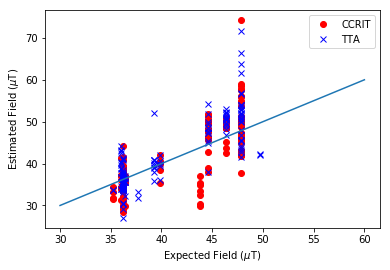

In [64]:
plt.plot(ccrit_merged.B_exp,ccrit_merged.specimen_int_uT,'ro',label='CCRIT')
plt.plot(tta_merged.B_exp,tta_merged.specimen_int_uT,'bx',label='TTA')
plt.legend()
plt.xlabel('Expected Field ($\mu$T)')
plt.ylabel('Estimated Field ($\mu$T)')
plt.plot([30,60],[30,60]);

## Problem 2

Make a new directory Myfles2.  Go to the website, download and unpack the file

In [21]:
#!mkdir Myfiles2

In [20]:
ipmag.download_magic('magic_contribution_14132.txt',dir_path='Myfiles2',input_dir_path='Chapter_10/Problem_2',print_progress=False)


1  records written to file  ./contribution.txt
1  records written to file  ./locations.txt
2332  records written to file  ./sites.txt
2325  records written to file  ./samples.txt
6989  records written to file  ./specimens.txt
9328  records written to file  ./measurements.txt
2325  records written to file  ./ages.txt


True

Read in the _measurements.txt_ file and get  a unique list of method codes:

In [71]:
meas=pd.read_csv('Problem_2/measurements.txt',sep='\t',header=1)
methods=meas.method_codes.unique()
methods

array(['LT-AF-Z', 'LT-AF-I', 'LT-IRM', 'LP-X'], dtype=object)

Looking at the MagIC Method Codes website, these are:
- AF demagnetization step
- ARM acquisition step
- IRM acquisition step
- magnetic susceptibility measurement 

So we can get the ARM, IRM and susceptibility data out like this: 

In [83]:
ARMs=meas[meas.method_codes.str.contains('LT-AF-I')]
ARMs=ARMs.dropna(subset=['magn_mass'])
IRMs=meas[meas.method_codes.str.contains('LT-IRM')]
IRMs=IRMs.dropna(subset=['magn_mass'])
RMRMs=pd.merge(ARMs,IRMs, on='specimen')
#RMRMs=pd.merge(RMRMs,chis, on='specimen')
RMRMs.columns

Index(['citations_x', 'dir_dec_x', 'dir_inc_x', 'experiment_x', 'magn_mass_x',
       'meas_temp_x', 'measurement_x', 'method_codes_x', 'quality_x',
       'specimen', 'standard_x', 'susc_chi_mass_x', 'treat_ac_field_x',
       'treat_dc_field_x', 'treat_temp_x', 'citations_y', 'dir_dec_y',
       'dir_inc_y', 'experiment_y', 'magn_mass_y', 'meas_temp_y',
       'measurement_y', 'method_codes_y', 'quality_y', 'standard_y',
       'susc_chi_mass_y', 'treat_ac_field_y', 'treat_dc_field_y',
       'treat_temp_y'],
      dtype='object')

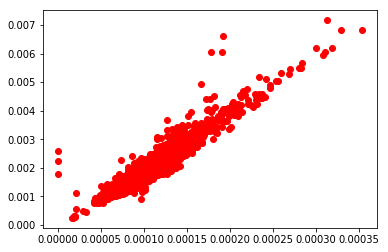

In [85]:
plt.plot(RMRMs.magn_mass_x,RMRMs.magn_mass_y,'ro');

In [123]:
specimens=pd.read_csv('Problem_2/specimens.txt',sep='\t',header=1)
specimens=specimens[specimens.citations.str.contains('Yamazaki')]
sites=pd.read_csv('Problem_2/sites.txt',sep='\t',header=1)
RPI_IRM['site']=RPI_IRM['specimen']
RPI=pd.merge(RPI_IRM,sites,on='site')
RPI.columns

Index(['analysts', 'citations_x', 'description', 'dir_dec', 'dir_inc',
       'dir_nrm_origin', 'dir_polarity', 'dir_tilt_correction',
       'geologic_classes_x', 'geologic_types_x', 'int_corr', 'int_rel',
       'lithologies_x', 'method_codes', 'result_quality', 'result_type',
       'sample', 'scientists', 'specimen', 'specimen_alternatives', 'volume',
       'weight', 'site', 'age', 'age_unit', 'citations_y', 'core_depth',
       'geologic_classes_y', 'geologic_types_y', 'lithologies_y', 'location'],
      dtype='object')

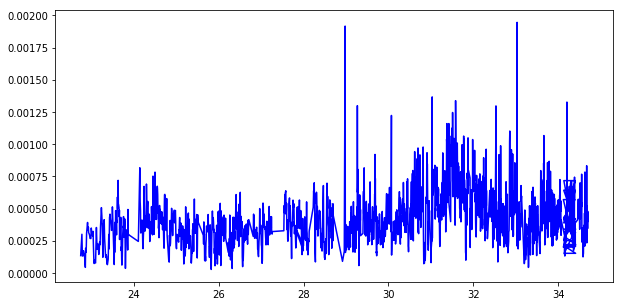

In [125]:
plt.figure(1,(10,5))
plt.plot(RPI.age,RPI.int_rel,'b-');

The minimal criteria would be a linear relationship between IRM and ARM and a range in concentrations that does not exceed 10.  These data pass these minimal criteria.  But it would be nice to replicate the data somewhere else too.  And Yamazaki has done this recently....  